# Análisis Descriptivo y Visualización de Datos 
## Integrantes
Sebastián Gómez - 2259474 <br>
Stiven Henao - 2259603 <br>
Víctor Hernández - 2259520 <br>

A continuación se presentan las gráficas para la visualización de datos y los respectivos analisis a cada una de ellas.

### Importación de las librerias necesarios

In [4]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

### Importación de nuestras dimensiones y tabla de hechos desde archivos csv

In [5]:
dim_customer = pd.read_csv('dim_customer.csv')
dim_date = pd.read_csv('dim_date.csv')
dim_payment_method = pd.read_csv('dim_payment_method.csv')
dim_product = pd.read_csv('dim_product.csv')
dim_shopping_mall = pd.read_csv('dim_shopping_mall.csv')
invoice = pd.read_csv('invoice.csv')

## 1. Análisis de Porcentaje de Clientes por Género 

### Observaciones  
- *Distribución de clientes:*  
  - *Mujeres:* 59.8%  
  - *Hombres:* 40.2%  

### Insights & Recomendaciones  
- *Predominio femenino:* Las mujeres representan la mayor parte de los clientes, lo que sugiere una mayor afinidad con los productos o servicios ofrecidos.  
- *Oportunidad de expansión en el público masculino:* Se podría investigar qué factores influyen en su menor participación y desarrollar estrategias para atraerlos.  
- *Estrategias diferenciadas:* Campañas de marketing dirigidas a cada segmento podrían optimizar el engagement y aumentar las ventas.  

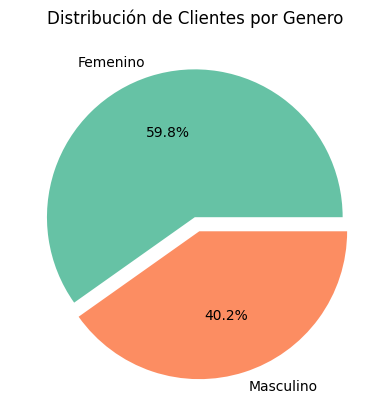

In [6]:
plt.figure()

colors = sns.color_palette('Set2')

plt.pie(dim_customer.gender.value_counts(),
        labels=['Femenino', 'Masculino'], 
        autopct='%.1f%%', colors=colors, 
        explode=(0, 0.1)
)

plt.title("Distribución de Clientes por Genero")
plt.show()

## 2. Análisis Edades vs. Frecuencia de Compras

### Distribución de Clientes por Edad:
  - Clientes distribuidos uniformemente entre *18 y 69 años*.  
  - La mayoría de las edades tienen entre *1,800 y 1,900 clientes*.  
  - Solo los *22 y 37 años* superan ligeramente los *2,000 clientes*.  

### Insights:
  - No hay una concentración marcada en una edad específica.  
  - Posible indicio de un mercado equilibrado en todas las edades.  
  - Picos en *22 y 37 años*, que podrían indicar un leve mayor interés en esas edades.  

### Recomendaciones:
  - Investigar qué factores influyen en los picos de 22 y 37 años.  
  - Analizar si el comportamiento es constante en el tiempo o varía según la temporada.

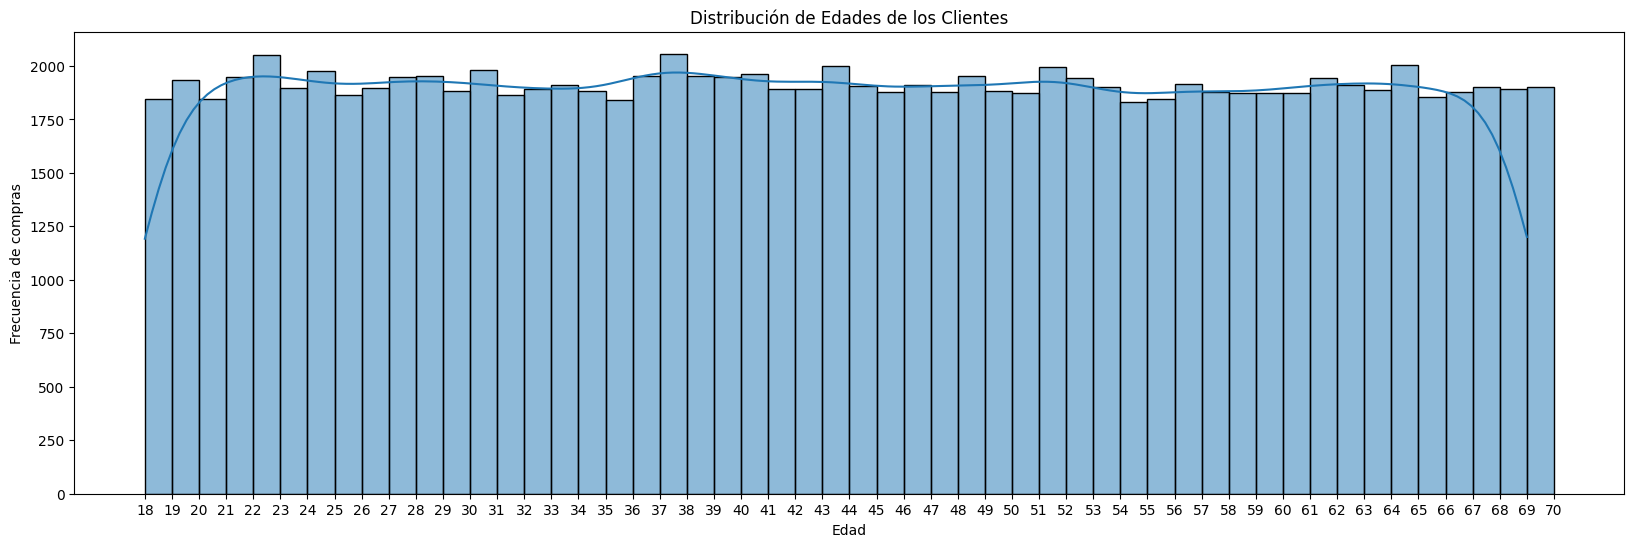

In [7]:
plt.figure(figsize=(20, 6))

sns.histplot(dim_customer.age, bins=range(18,71), kde=True)


plt.xticks(range(18, 71, 1)) 
plt.xlabel("Edad")
plt.ylabel("Frecuencia de compras")
plt.title("Distribución de Edades de los Clientes")
plt.show()

## 3. Análisis Gasto Total por Género  

### Distribución del Gasto Total:
  - *Hombres:* ₺101,298,654.03 Liras Turcas  
  - *Mujeres:* ₺150,207,140.22 Liras Turcas  

## Insights:  
  - Las mujeres han gastado *aproximadamente un 48% más* que los hombres.  
  - Esto sugiere una mayor participación femenina en el consumo total de la tienda.  

## Recomendaciones:
  - Diseñar estrategias para aumentar el gasto masculino.  
  - Analizar qué productos son más comprados por cada género y enfocar campañas en ellos.

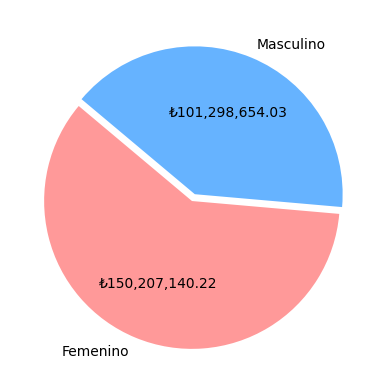

In [8]:
data = invoice.merge(dim_customer[['customer_id', 'gender']], how='inner', on='customer_id')
gasto_por_genero = data.groupby("gender")["total_price"].sum()

plt.figure()

# definicion de formato monetario
def format_monetary(value):
    return f"₺{value:,.2f}" 

plt.pie(
    gasto_por_genero, 
    labels=['Femenino', 'Masculino'], 
    autopct=lambda p: format_monetary(p * gasto_por_genero.sum() / 100),  #aplico el formato monetario
    colors=["#ff9999", "#66b3ff"], 
    startangle=140,
    explode=[0.05, 0]
)

plt.show()


## 4. Análisis de Ventas Mensuales (2021-2023)

### Tendencias  
- Ventas estables con algunas fluctuaciones y picos en ciertos meses.  

### Caídas Claves  
- Disminución en *enero de 2022 y 2023*.  
- *Marzo de 2023 con caída drástica*, debido a falta de datos.  

### Insights & Recomendaciones  
- Caída en marzo de 2023 debido a que se dejan de tomar datos en dicho mes.
- Analizar patrones estacionales en bajas de enero.  
- Replicar estrategias de meses con alto desempeño.

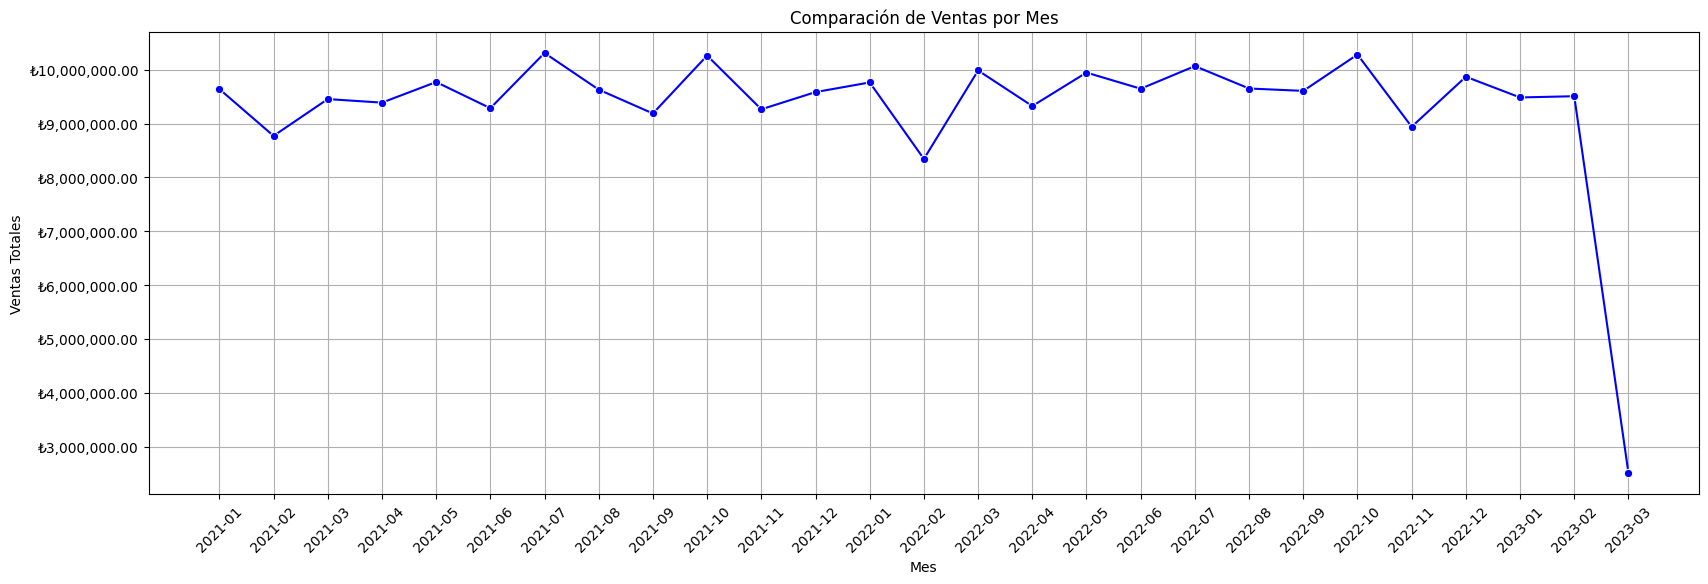

In [9]:
import matplotlib.ticker as mtick # para formatear el eje Y en formato monetario

data_with_datetime =  pd.read_csv('df_star.csv')


# convertir invoice_date a datetime
data_with_datetime["invoice_date"] = pd.to_datetime(data_with_datetime["invoice_date"])

# extraer año y mes
data_with_datetime["year_month"] = data_with_datetime["invoice_date"].dt.to_period("M") 

# agrupar por mes y calcular ventas totales
ventas_mensuales = data_with_datetime.groupby("year_month")["total_price"].sum().reset_index()

# convertir a string para evitar problemas en el eje X
ventas_mensuales["year_month"] = ventas_mensuales["year_month"].astype(str)


plt.figure(figsize=(20, 6))
sns.lineplot(data=ventas_mensuales, x="year_month", y="total_price", marker="o", color="b")

formatter = mtick.FuncFormatter(lambda x, _: f'₺{x:,.2f}') # formato monetario
plt.gca().yaxis.set_major_formatter(formatter)

plt.xticks(rotation=45)
plt.xlabel("Mes")
plt.ylabel("Ventas Totales")
plt.title("Comparación de Ventas por Mes")
plt.grid(True)

plt.show()

## 5. Análisis de Compras por Categoría  

### Observaciones  
- *Ropa (Clothing)* es la categoría con mayor cantidad de compras, destacándose ampliamente.  
- *Cosméticos y Alimentos & Bebidas* tienen un volumen similar y son las siguientes más vendidas.  
- *Tecnología, Souvenirs y Libros* son las categorías con menos compras.  

### Insights & Recomendaciones  
- *Potenciar stock y promociones en Ropa*, ya que es la categoría más popular.  
- *Analizar oportunidades en Tecnología y Libros*, explorando estrategias de marketing o descuentos.  
- *Revisar patrones de compra en Cosméticos y Alimentos*, para identificar si su demanda es estacional.

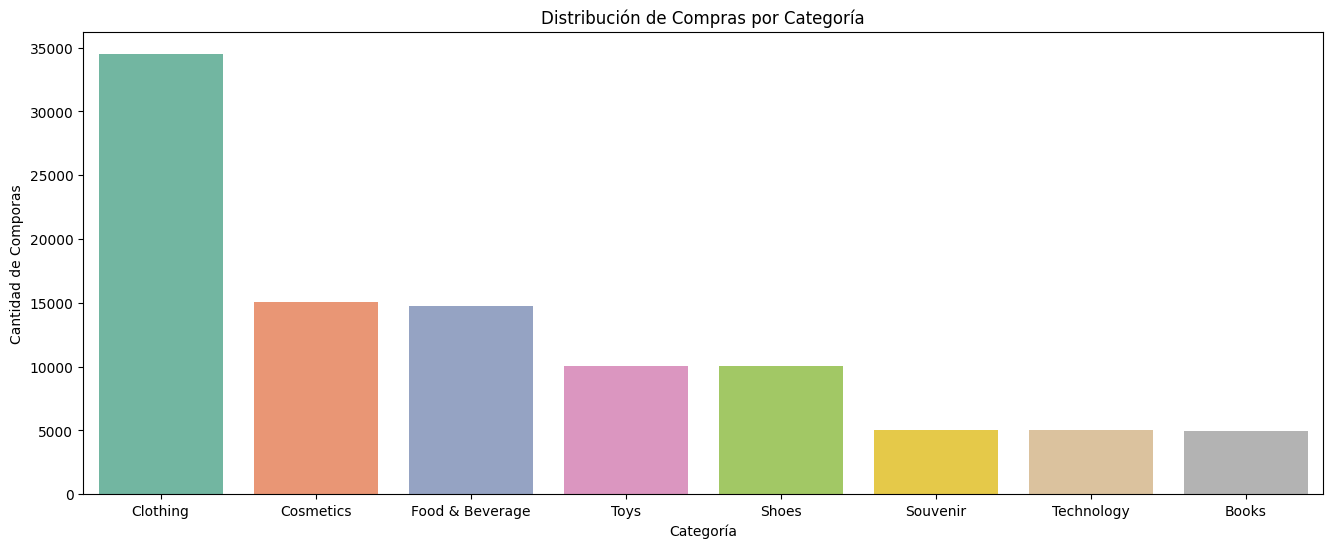

In [10]:
data_for_category_group = invoice.merge(dim_product[['product_id', 'category']], how='left', on='product_id').drop(columns=invoice.columns)

# contar la cantidad de datos por categoria
category_counts = data_for_category_group['category'].value_counts().to_frame()

# convertir la series en df con reset_index()
df_category_counts = category_counts.reset_index()

# renombrar las columnas para mayor claridad
df_category_counts.columns = ['category', 'count']
df_category_counts

plt.figure(figsize=(16,6))

sns.barplot(x="category", y="count", data=df_category_counts, palette="Set2", hue="category")

plt.xlabel("Categoría")
plt.ylabel("Cantidad de Comporas")
plt.title("Distribución de Compras por Categoría")

plt.show()

## 6. Análisis del Mapa de Calor: Edad vs Categoría de Producto  

### Observaciones  
- *Clothing* es la categoría más comprada en casi todos los grupos de edad.  
- Las edades entre *20 y 40 años* muestran mayor actividad de compra en múltiples categorías.  
- *Libros y Tecnología* tienen menor frecuencia de compra en general.  
- La variación en tonos muestra diferencias en la preferencia de productos según la edad.  

### Insights & Recomendaciones  
- *Segmentar promociones* según las preferencias de edad.  
- *Potenciar ofertas en categorías menos vendidas*, enfocándose en públicos específicos.  
- *Revisar tendencias de consumo en diferentes edades* para ajustar estrategias de marketing.

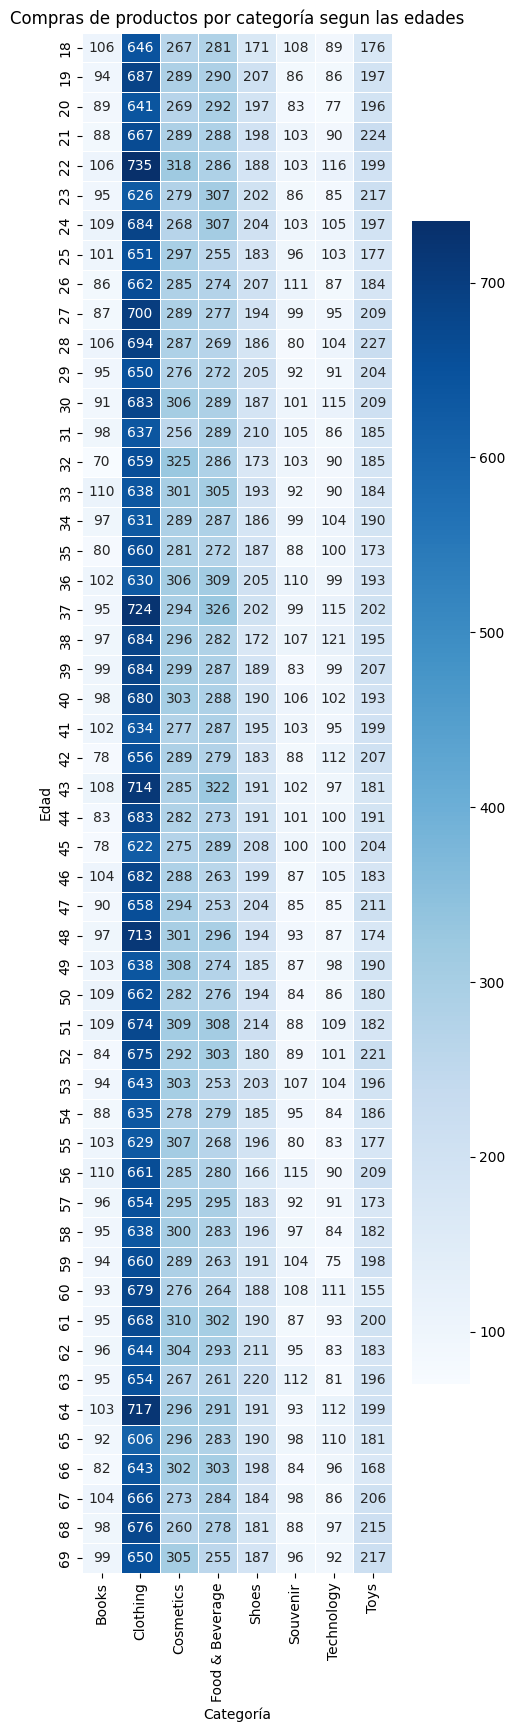

In [11]:
data = invoice.merge(dim_customer[['customer_id', 'age']], how='left', on='customer_id').merge(dim_product[['product_id', 'category']], how='left', on='product_id')

plt.figure(figsize=(5, 20))
# agrupar los datos - contar compras por combinacion de edad y categoria
heatmap_data = data.pivot_table(index='age', columns='category', values='invoice_id', aggfunc='count')

sns.heatmap(heatmap_data, cmap="Blues", annot=True, fmt=".0f", linewidths=0.5)

plt.title('Compras de productos por categoría segun las edades')
plt.xlabel('Categoría')
plt.ylabel('Edad')

plt.show()

## 7. Análisis Relación entre Precio y Cantidad Vendida  

### Observaciones  
- Se utilizó una *escala logarítmica* en el eje de precios debido a la amplia variabilidad de valores.  
- *Productos de menor precio* presentan una mayor dispersión en la cantidad vendida.  
- *Los productos más costosos tienen menor cantidad de ventas*, pero aún se observan algunas compras.  
- No se observa una relación lineal clara, indicando que otros factores pueden influir en la compra.  

### Insights & Recomendaciones  
- *Segmentar estrategias de precios* para diferentes rangos de productos.  
- *Evaluar promociones o descuentos* en productos de alto precio para incentivar la compra.  
- *Analizar productos con alta demanda y bajo precio*, ya que pueden representar oportunidades de mayor margen con ajustes estratégicos.

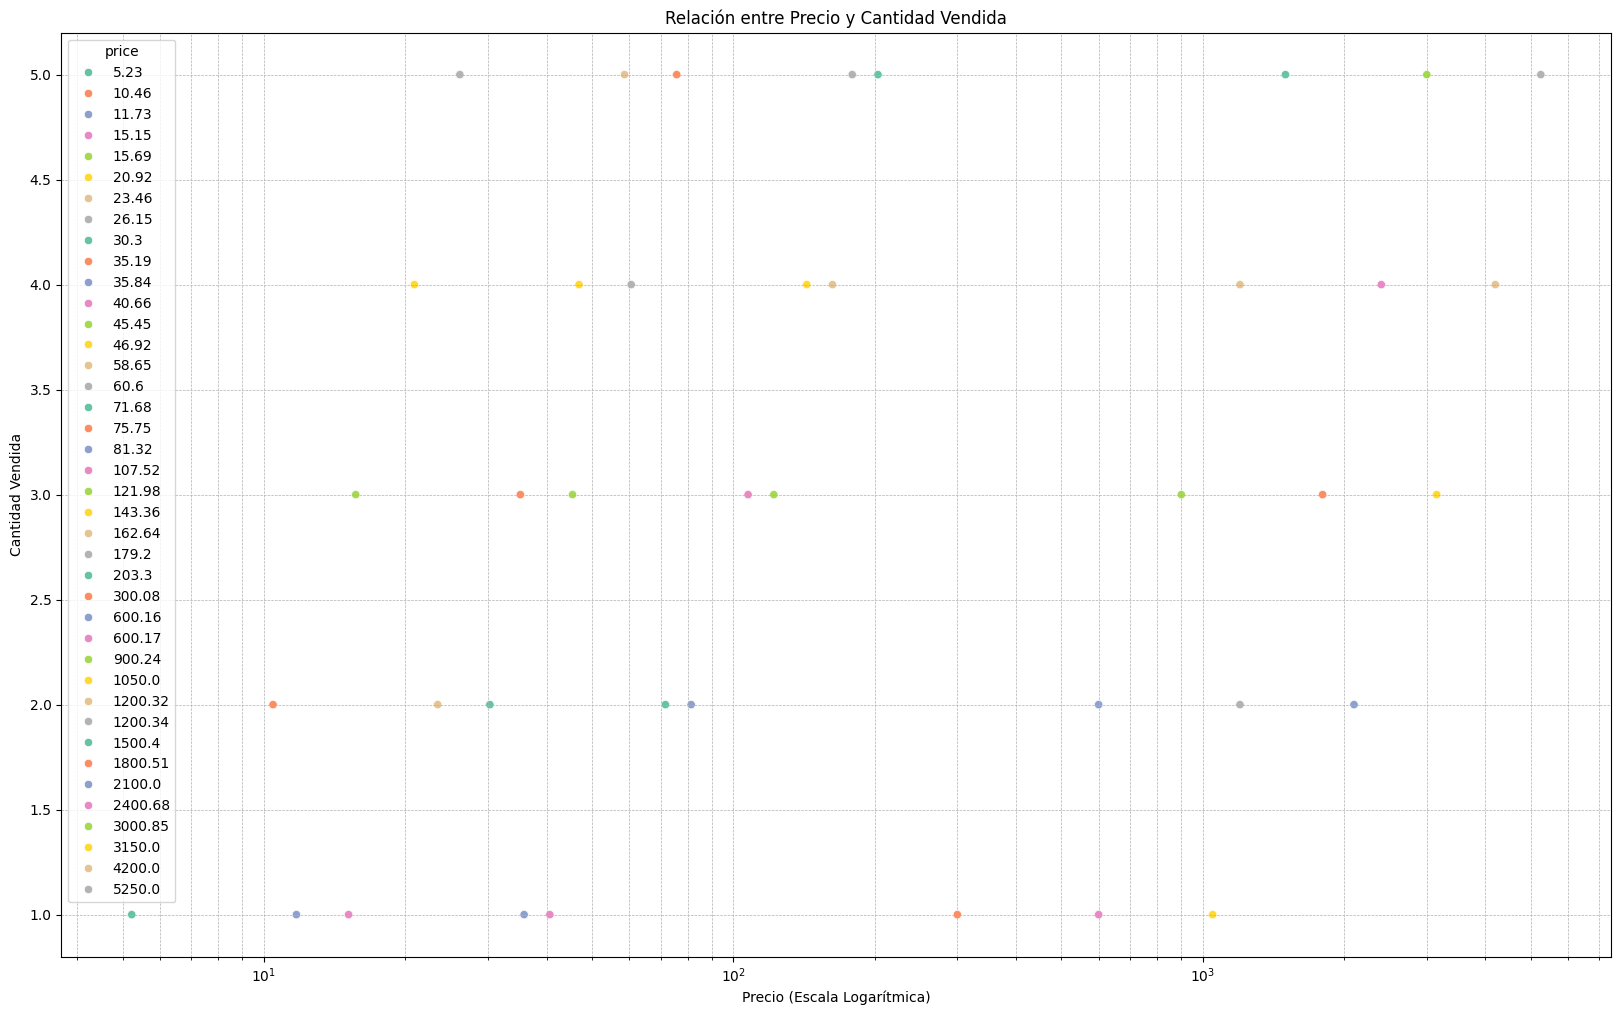

In [12]:
data = invoice.merge(dim_product[['product_id', 'price']], how='left', on='product_id')

plt.figure(figsize=(20, 12))


ax = sns.scatterplot(x='price', y='quantity', data=data, hue='price', palette='Set2')

# aplico escala logaritmica
plt.xscale("log")

plt.xlabel("Precio (Escala Logarítmica)")
plt.ylabel("Cantidad Vendida")
plt.title("Relación entre Precio y Cantidad Vendida")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


## 8. Análisis Distribución de Precios por Categoría de Producto  

### Observaciones  
- Las categorías "Shoes" y "Technology" presentan los precios más altos con una gran dispersión.  
- "Clothing" tiene precios moderados, con una mediana cercana a 1000.  
- "Books", "Cosmetics", "Food & Beverage", "Toys" y "Souvenir" muestran precios bajos y estables, con menor dispersión.  
- Existen posibles valores atípicos (outliers) en algunas categorías, especialmente en "Shoes" y "Technology", lo que indica productos con precios significativamente más altos.  

###  Insights & Recomendaciones  
- Diferenciar estrategias de precios según la variabilidad de cada categoría.  
- Para categorías con alta dispersión (ej. "Shoes" y "Technology"), evaluar si los precios extremos afectan las ventas.  
- Para categorías con precios bajos y estables, considerar estrategias de volumen o diferenciación para mejorar el margen.  
- Investigar los outliers para determinar si representan productos exclusivos o errores de precios.

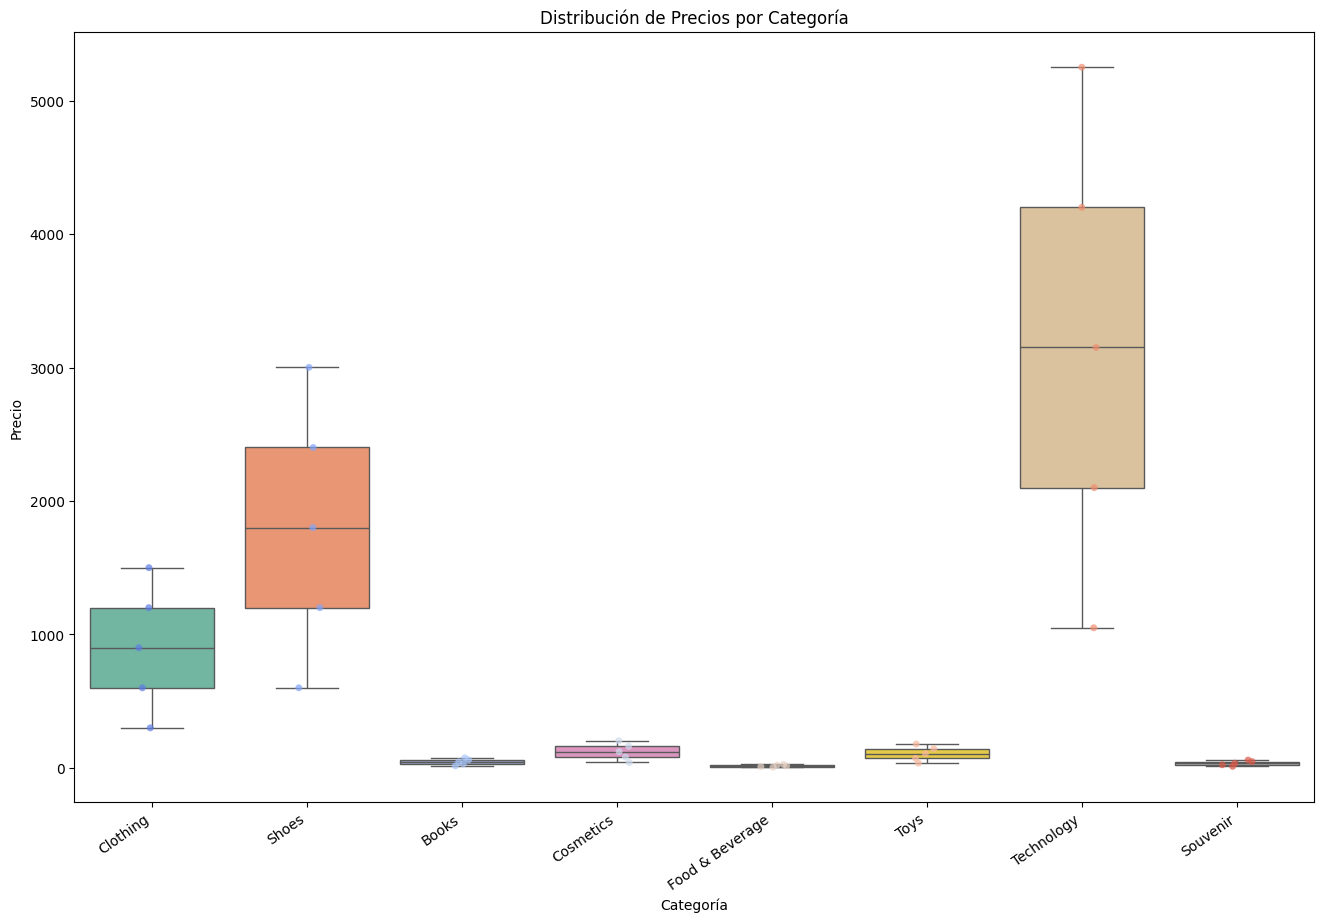

In [13]:
plt.figure(figsize=(16, 10))
sns.boxplot(x="category", y="price", data=dim_product, hue="category", palette="Set2")

# agregamos un striplot para complementar
sns.stripplot(x="category", y="price", data=dim_product, hue="category", palette="coolwarm", alpha=0.7)

plt.title("Distribución de Precios por Categoría")
plt.xlabel("Categoría")
plt.ylabel('Precio')
plt.xticks(rotation=35, ha='right')
plt.show()

## 9. Análisis Gastos Totales por Centro Comercial

### Observaciones
- "Kanyon" y "Mall of Istanbul" lideran en gastos totales, con valores cercanos a ₺50,000,000.
- "Metrocity" también muestra un gasto elevado, aunque menor que los dos primeros.
- "Istinye Park" y "Metropol AVM" tienen gastos intermedios, alrededor de ₺20,000,000 - ₺30,000,000.
- Los centros comerciales con menor gasto son "Cevahir AVM", "Emaar Square Mall", "Forum Istanbul", "Viaport Outlet" y "Zorlu Center", todos por debajo de ₺15,000,000.

### Insights & Recomendaciones
- Los centros con mayor gasto total pueden representar zonas de alto poder adquisitivo o tener una oferta más atractiva.
- Investigar qué factores impulsan el gasto en "Kanyon" y "Mall of Istanbul" (ubicación, tiendas premium, volumen de clientes, etc.).
- Analizar estrategias para mejorar el rendimiento de los centros con menor gasto, como promociones, eventos o mejoras en la oferta comercial.
- Evaluar si el tamaño del centro comercial influye en el gasto total generado.

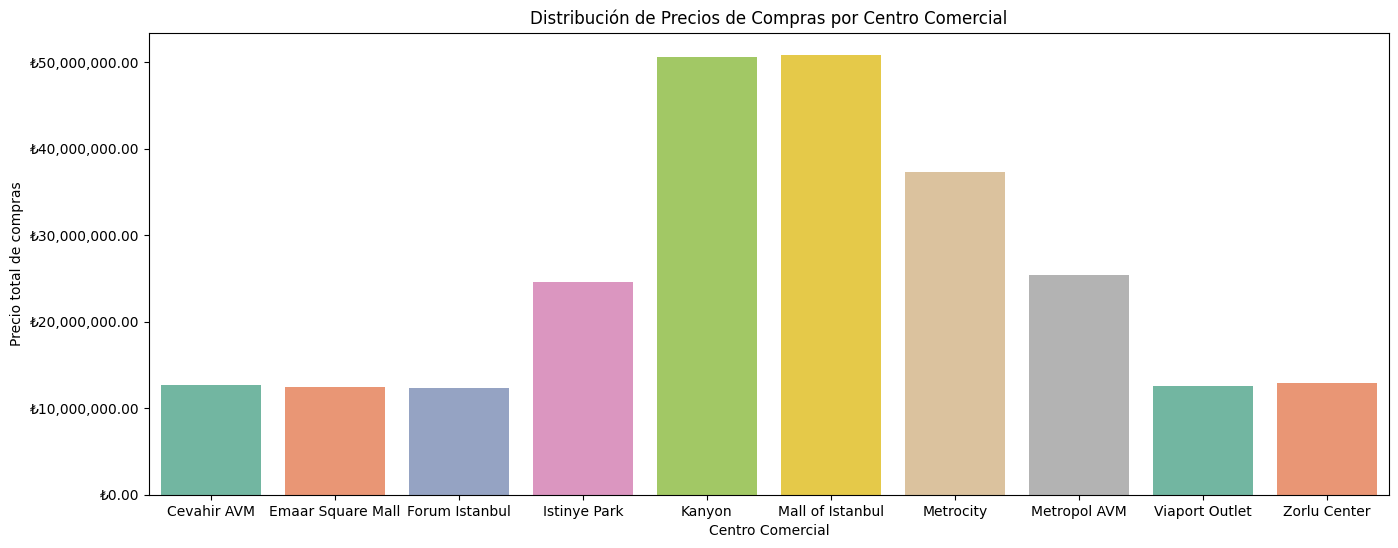

In [14]:
data = invoice.merge(dim_shopping_mall[['shopping_mall_id', 'name']], how='left', on='shopping_mall_id')

# agrupar por centro comercial y sumar los total_price
shopping_mall_sales = data.groupby('name', as_index=False)['total_price'].sum()

shopping_mall_sales.rename(columns={'total_price': 'total_spent'}, inplace=True)

plt.figure(figsize=(16, 6))

sns.barplot(x="name", y="total_spent", data=shopping_mall_sales, palette="Set2", hue="name")
formatter = mtick.FuncFormatter(lambda x, _: f'₺{x:,.2f}')  # formato monetario
plt.gca().yaxis.set_major_formatter(formatter)

plt.ylabel('Precio total de compras')
plt.xlabel('Centro Comercial')
plt.title('Distribución de Precios de Compras por Centro Comercial')
plt.show()


## 10. Análisis de la Distribución de Edades por Género

### Observaciones:
- Tanto hombres como mujeres tienen una distribución de edad similar, con un rango de **20 a 70 años aproximadamente.
- La mediana de edad se encuentra en torno a los 40-45 años para ambos géneros.
- Se observa una concentración mayor de datos en el rango de 30 a 60 años, lo que indica que la mayoría de las personas en el conjunto de datos pertenecen a este grupo etario.
- Los extremos de la distribución (valores más bajos y más altos) presentan menos densidad, como lo muestra la forma del violin plot.
- El boxenplot permite ver mejor la dispersión en los extremos, reflejando posibles valores atípicos o subgrupos con menor frecuencia.

### Insights & Recomendaciones:
- Si se está analizando para marketing o toma de decisiones comerciales, los productos o servicios podrían enfocarse en la población de **30-60 años, ya que es donde hay mayor concentración de usuarios.
- Se recomienda analizar por qué hay menos personas en los extremos de la distribución (20-30 y 60-70 años). ¿Es por falta de interés en el producto/servicio, menor accesibilidad o simplemente menor representación en los datos?
- Si el objetivo es diseñar estrategias diferenciadas por edad, se pueden crear **segmentos específicos en función de estos datos.

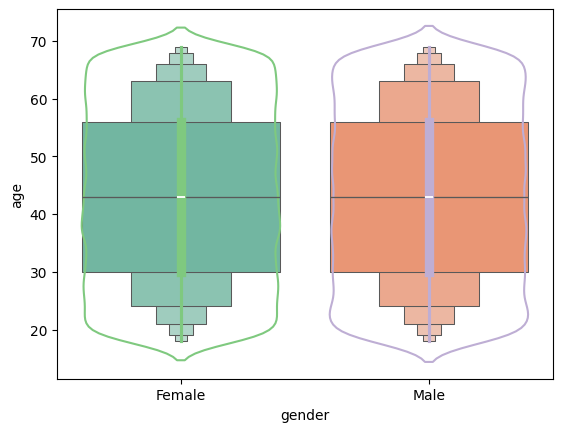

In [15]:
plt.figure()

sns.boxenplot(y="age", x="gender", data=dim_customer, palette="Set2", hue="gender")

# complemento con un violin plot
sns.violinplot(y="age", x="gender", data=dim_customer, palette="Accent", hue="gender", fill=False)
plt.show()

# 11. Análisis de Métodos de Pago  

## Observaciones  
- Efectivo es el método de pago más utilizado, seguido por tarjeta de crédito y tarjeta de débito.  
- En términos de proporción, el 44.7% de las transacciones se realizan en efectivo, 35.1% con tarjeta de crédito y 20.2% con tarjeta de débito.  
- En la comparación anual, el uso de efectivo ha disminuido mientras que las tarjetas han ganado participación.  

## Insights & Recomendaciones  
- Tendencia de digitalización: A pesar del predominio del efectivo, el uso de tarjetas sigue en aumento. Se recomienda fomentar estrategias de adopción digital como descuentos o cashback en pagos electrónicos.  
- Tarjeta de crédito vs débito: La tarjeta de crédito tiene una mayor preferencia que la de débito. Puede ser beneficioso ofrecer mejores incentivos en débito para equilibrar su uso.  
- Efectivo sigue siendo fuerte: Aunque está disminuyendo, sigue siendo el método principal. No se debe descartar, pero sí acompañar con opciones digitales.

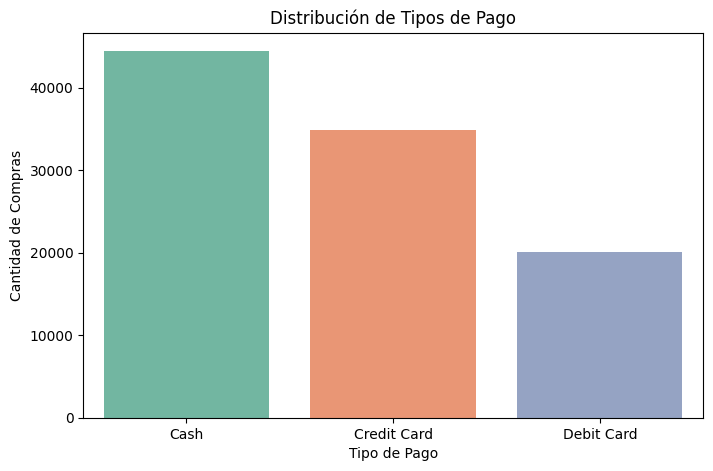

In [16]:
raw_data = invoice.merge(dim_payment_method[['payment_method_id', 'type']], how='left', on='payment_method_id')
processed_data = raw_data['type'].value_counts().to_frame()
# Convertir la Series en DataFrame con reset_index()
processed_data = processed_data.reset_index()

# Renombrar las columnas para mayor claridad
processed_data.columns = ['type', 'count']
processed_data

# Crear el gráfico
plt.figure(figsize=(8,5))

sns.barplot(data=processed_data, x='type', y='count', palette='Set2', hue='type')

plt.xlabel('Tipo de Pago')
plt.ylabel('Cantidad de Compras')
plt.title('Distribución de Tipos de Pago')
plt.show()

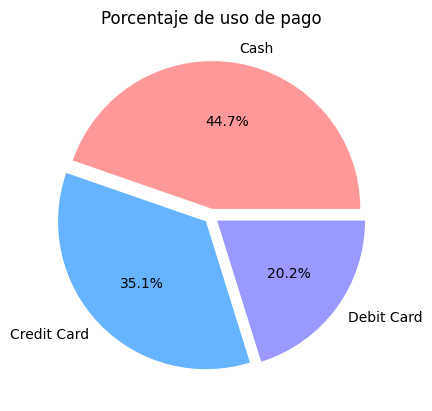

In [17]:
raw_data = invoice.merge(dim_payment_method[['payment_method_id', 'type']], how='left', on='payment_method_id')
processed_data = raw_data['type'].value_counts().to_frame()


processed_data = processed_data.reset_index()

processed_data.columns = ['type', 'count']
processed_data

plt.figure()

plt.pie(processed_data['count'], labels=processed_data['type'], autopct='%1.1f%%', colors=["#ff9999", "#66b3ff", "#9999ff"], explode=[0.05, 0.05, 0.05])

plt.title('Porcentaje de uso de pago')
plt.show()

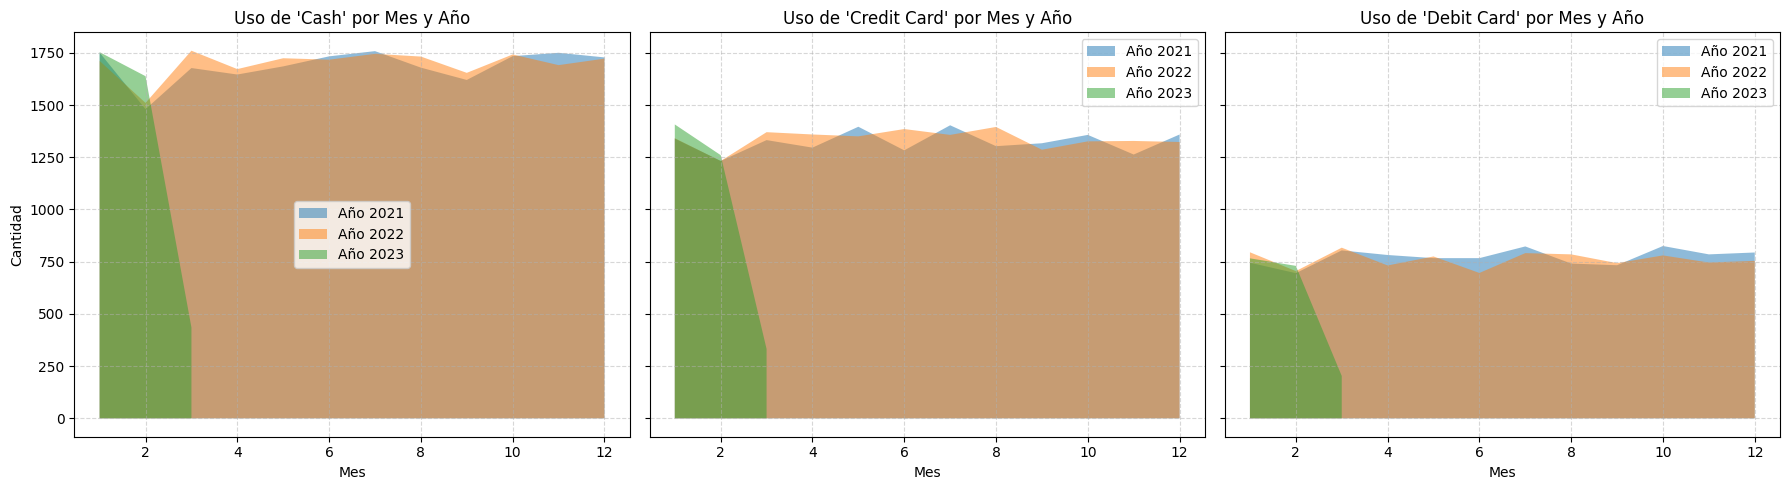

In [18]:
data = data_with_datetime.merge(dim_payment_method[['payment_method_id', 'type']], how='left', on='payment_method_id')
data = data.drop(columns=['payment_method_id', 'customer_id', 'product_id', 'quantity', 'total_price', 'shopping_mall_id', 'payment_method_id', 'year_month'])

data["invoice_date"] = pd.to_datetime(data["invoice_date"])
data["year"] = data["invoice_date"].dt.year
data["month"] = data["invoice_date"].dt.month

payment_counts = data.groupby(["type", "year", "month"]).size().reset_index(name="count")

# filtro tipo de pago
cash_counts = payment_counts[payment_counts["type"] == "Cash"]
credit_counts = payment_counts[payment_counts["type"] == "Credit Card"]
debit_counts = payment_counts[payment_counts["type"] == "Debit Card"]

# crear figura con 3 graficos en una fila
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# === grafico 1: uso de Cash ===
for year in cash_counts["year"].unique():
    subset = cash_counts[cash_counts["year"] == year]
    axes[0].fill_between(subset["month"], subset["count"], alpha=0.5, label=f"Año {year}")
axes[0].set_title("Uso de 'Cash' por Mes y Año")
axes[0].set_xlabel("Mes")
axes[0].set_ylabel("Cantidad")
axes[0].legend()
axes[0].grid(True, linestyle="--", alpha=0.5)

# === grafico 2: uso de Credit Card ===
for year in credit_counts["year"].unique():
    subset = credit_counts[credit_counts["year"] == year]
    axes[1].fill_between(subset["month"], subset["count"], alpha=0.5, label=f"Año {year}")
axes[1].set_title("Uso de 'Credit Card' por Mes y Año")
axes[1].set_xlabel("Mes")
axes[1].legend()
axes[1].grid(True, linestyle="--", alpha=0.5)

# === grafico 3: uso de Debit Card ===
for year in debit_counts["year"].unique():
    subset = debit_counts[debit_counts["year"] == year]
    axes[2].fill_between(subset["month"], subset["count"], alpha=0.5, label=f"Año {year}")
axes[2].set_title("Uso de 'Debit Card' por Mes y Año")
axes[2].set_xlabel("Mes")
axes[2].legend()
axes[2].grid(True, linestyle="--", alpha=0.5)


plt.tight_layout()
plt.show()